##About Dataset
The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attributes and 1 output attribute (class)
The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

##Dataset columns:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelBinarizer,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,BaseDecisionTree
from sklearn.decomposition import PCA,KernelPCA,SparsePCA,IncrementalPCA,MiniBatchSparsePCA
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Algerian_forest_fires_dataset.csv to Algerian_forest_fires_dataset.csv


In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.shape

(247, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
#Data Cleaning
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [8]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [10]:
##As the attached dataset is divided into two parts till 122 it is 0ne region dataset and after 122 it is another region dataset we
##will simply create an another column named region and will encode it with 0 and 1
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [11]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
218,2,9,2012,28,67,19,0,75.4,2.9,16.3,2,4,0.8,not fire,1.0
175,21,7,2012,36,29,18,0,93.9,39.6,80.6,18.5,39.5,30,fire,1.0
233,17,9,2012,34,44,12,0,92.5,25.2,63.3,11.2,26.2,17.5,fire,1.0
79,19,8,2012,35,62,19,0,89.4,23.2,120.9,9.7,31.3,17.2,fire,0.0
37,8,7,2012,33,68,19,0,85.6,12.5,49.8,6,15.4,8,fire,0.0
223,7,9,2012,31,62,15,0,83.3,5.8,17.7,3.8,6.4,3.2,fire,1.0
97,6,9,2012,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0.9,not fire,0.0
23,24,6,2012,32,66,17,0,85.9,11.2,55.8,5.6,14.9,7.5,fire,0.0
231,15,9,2012,32,51,13,0,88.7,16,50.2,6.9,17.8,9.8,fire,1.0
73,13,8,2012,35,63,15,0,87,19,85.1,5.9,24.4,10.2,fire,0.0


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
df['Classes  '].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.6+ KB


In [15]:
df['Region']=df['Region'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 38.6+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [17]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [18]:
df=df.reset_index()

In [19]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [20]:
df.drop(122, inplace=True)

In [21]:
df.drop('index',inplace=True,axis=1)

In [22]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [23]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [24]:
##As we can see that there are some extra name spaces in the column names so lets remove the extra name spaces
df.columns=df.columns.str.strip()
#The .strip() method is not a specific method in pandas, but rather a string method that
#can be applied to pandas Series containing string data. It is used to remove leading
#and trailing whitespace (spaces, tabs, or other whitespace characters)
#from each element in the Series. This can be useful for cleaning up text data in a DataFrame.

In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df['day'].value_counts()

1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
2     8
15    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
14    7
31    4
Name: day, dtype: int64

In [27]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [30]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI',]]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI',]].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [32]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [33]:
#encoding the classes column
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [34]:
df.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
127,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,1
163,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
135,13,6,2012,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9,0,1
37,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,1,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,0
39,10,7,2012,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,0,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
202,20,8,2012,36,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,1,1
40,11,7,2012,33,76,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2,0,0
36,7,7,2012,35,64,18,0.2,80.0,9.7,40.4,2.8,12.1,3.2,0,0


<Axes: >

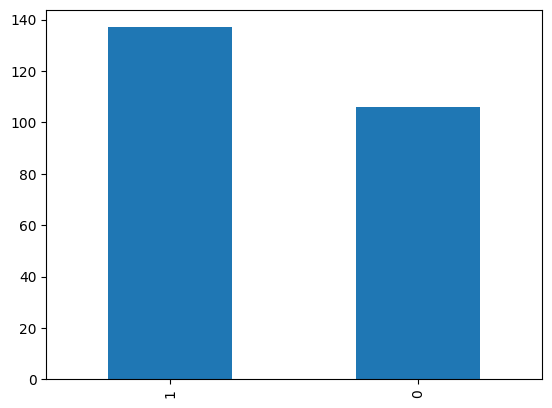

In [35]:
df.Classes.value_counts().plot(kind='bar')

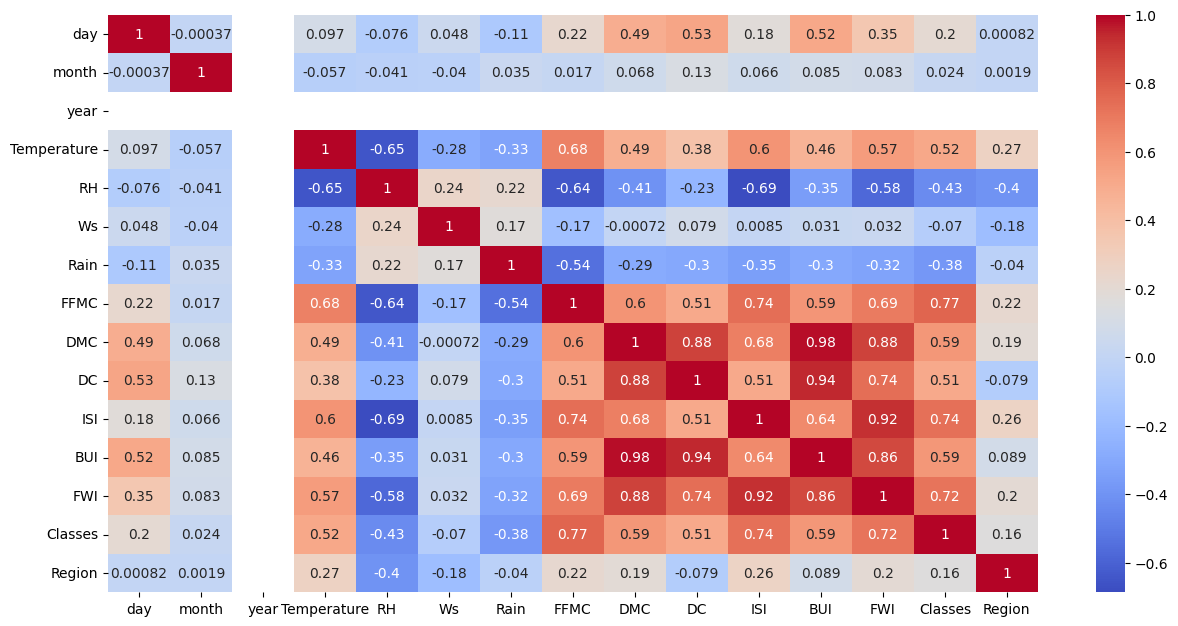

In [36]:
correlation=df.corr()
plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

## By checking the correlation matrix we can only identify the pair of highly correlated features and we eliminates one feature out of them but we dont know which feature is more important among them.

In [37]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [38]:
df=df.drop(['day', 'month', 'year'],axis=1)

##Question 1:
Q: What is a correlation matrix, and what is its purpose in data analysis?

A correlation matrix is a square matrix that displays the pairwise correlations between variables in a dataset. It shows how strongly and in what direction two variables are related. The main purpose of a correlation matrix is to identify relationships between variables, assess multicollinearity, and aid in feature selection or dimensionality reduction.

##Question 2:
Q: How is the correlation coefficient calculated, and what are its possible values?

A:
The correlation coefficient, often denoted as "r" or "ρ," measures the strength and direction of the linear relationship between two variables. It is calculated using the Pearson correlation formula:

�
=
∑
(
�
−
�
ˉ
)
(
�
−
�
ˉ
)
∑
(
�
−
�
ˉ
)
2
⋅
∑
(
�
−
�
ˉ
)
2
r=
∑(X−
X
ˉ
 )
2
 ⋅∑(Y−
Y
ˉ
 )
2

​

∑(X−
X
ˉ
 )(Y−
Y
ˉ
 )
​


The correlation coefficient can range from -1 to 1:

A positive value (closer to 1) indicates a positive linear relationship.
A negative value (closer to -1) indicates a negative linear relationship.
A value close to 0 suggests little to no linear relationship.

##Question 3:
Q: How do you interpret the values in a correlation matrix?

A:
Interpretation of the values in a correlation matrix:

Values close to 1 or -1 indicate a strong linear relationship in the corresponding direction (positive or negative).
A value close to 0 suggests little to no linear relationship.
Values between -1 and 1 indicate the strength of the relationship.

##Q: What is the significance of diagonal elements in a correlation matrix?

A:
The diagonal elements of a correlation matrix always have a value of 1 because they represent the correlation of a variable with itself. This is known as perfect correlation, as a variable is perfectly correlated with itself. Diagonal elements are often shown as 1s in a correlation matrix.

##Q: Can a correlation matrix be used to identify causation between variables?

A:
No, a correlation matrix cannot establish causation. It can only show the strength and direction of linear relationships between variables. Causation implies that changes in one variable cause changes in another, which requires additional experimental or causal inference methods to establish.

##Q: How can you visually represent a correlation matrix?

A:
A common way to visualize a correlation matrix is by using a heatmap, where each cell's color represents the strength and direction of the correlation. Positive correlations are often shown in one color scale (e.g., shades of blue), and negative correlations in another (e.g., shades of red), with intensity indicating the strength of the correlation.

##Q: What is the difference between a positive and a negative correlation coefficient in a correlation matrix?

A:

A positive correlation coefficient (closer to 1) indicates that as one variable increases, the other tends to increase as well.
A negative correlation coefficient (closer to -1) indicates that as one variable increases, the other tends to decrease.

##Q: When is the Spearman rank correlation coefficient used, and how does it differ from the Pearson correlation coefficient?

A:
The Spearman rank correlation coefficient is used when the relationship between variables is not linear or when data is ordinal. It measures the strength and direction of the monotonic relationship between variables. Unlike the Pearson correlation, the Spearman correlation is based on the ranks of data points rather than their actual values.

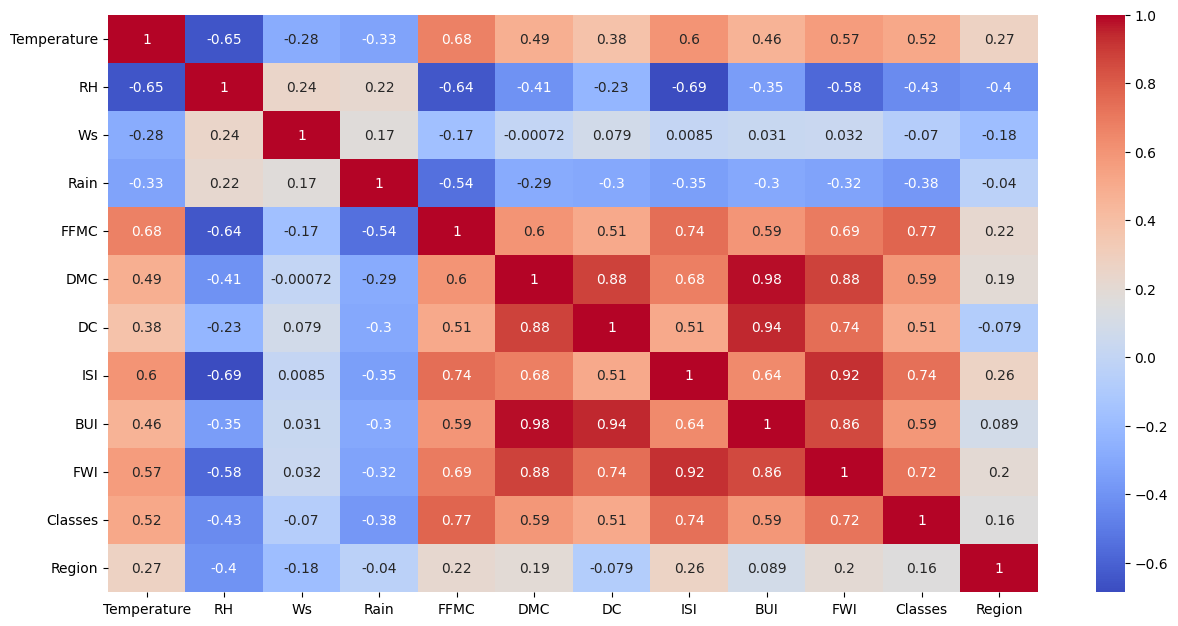

In [39]:
correlation_2=df.corr()
plt.figure(figsize=(15,7.5))
sns.heatmap(correlation_2,annot=True,cmap='coolwarm')
plt.show()

##Multicollinearity is a statistical phenomenon that occurs when two or more independent variables (features) in a regression model are highly correlated with each other. In other words, it's a situation where one independent variable in a regression model can be linearly predicted from the others with a substantial degree of accuracy. Multicollinearity can cause several issues in regression analysis, and it's important to understand its implications.
Coefficient Instability: When two or more variables are highly correlated, small changes in the data can result in large changes in the estimated coefficients. This makes the regression model unstable and less reliable.

Interpretability Issues: It becomes difficult to interpret the individual effect of each independent variable on the dependent variable because they are so intertwined.

Inflated Standard Errors: Multicollinearity tends to inflate the standard errors of the regression coefficients. Larger standard errors mean wider confidence intervals and reduced statistical significance of coefficients.

Reduced Predictive Power: Multicollinearity doesn't affect the predictive power of the model, but it can make it harder to determine which predictors are contributing the most to the predictions.

Difficulty in Identifying Important Features: In the presence of multicollinearity, it's challenging to identify which features are truly important for the model since they may appear less significant than they actually are.

To address multicollinearity, you can take several steps:

Correlation Analysis: Calculate correlation coefficients between independent variables to identify highly correlated pairs.

Feature Selection: Choose a subset of features that are most relevant to the problem, removing redundant ones.

Feature Engineering: Combine or transform correlated features into a single feature.

Regularization: Use techniques like Ridge or Lasso regression, which penalize the influence of less important features and can help mitigate multicollinearity.

Collect More Data: Sometimes, multicollinearity can be alleviated by collecting more data.

Principal Component Analysis (PCA): PCA can be used to transform the original features into a set of orthogonal (uncorrelated) features, reducing multicollinearity.

Handling multicollinearity is essential for building robust and interpretable regression models. The choice of method depends on the specific problem and dataset.

##Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

Multicollinearity can lead to unstable and unreliable coefficient estimates, making it harder to interpret the results and draw meaningful conclusions from the model. It is essential to detect and address multicollinearity to ensure the validity and robustness of regression models.

Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

##This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.

Let me take a simple example from our everyday life to explain this. Colin loves watching television while munching on chips. The more television he watches, the more chips he eats, and the happier he gets!

Now, if we could quantify happiness and measure Colin’s happiness while he’s busy doing his favorite activity, which do you think would have a greater impact on his happiness? Having chips or watching television? That’s difficult to determine because the moment we try to measure Colin’s happiness from eating chips, he starts watching television. And the moment we try to measure his happiness from watching television, he starts eating chips.


Introduction
Multicollinearity might be a handful to pronounce, but it’s a topic you should be aware of in the field of data science and machine learning, especially if you’re sitting for data scientist interviews! In this article, we will understand what multicollinearity is and how it is caused. We will also try to understand why it is a problem and how we can detect and fix it.

Multicollinearity
Before diving further, it is imperative to have a basic understanding of regression and some statistical terms. For this, I highly recommend going through the below resources:

Fundamentals of Regression Analysis (Free Course!)
Beginner’s Guide to Linear Regression
Learning Objective

Understand what multicollinearity is and why it is a problem in a regression model.
Learn the causes of multicollinearity.
Understand how to detect multicollinearity using the variance inflation factor (VIF).
Learn about the methods used to fix multicollinearity, including dropping correlated features.
Table of contents
Introduction
What Is Multicollinearity?
The Problem With Having Multicollinearity
What Causes Multicollinearity?
Detecting Multicollinearity Using a Variance Inflation Factor (VIF)
Fixing Multicollinearity
Conclusion
Frequently Asked Questions
What Is Multicollinearity?
Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

Multicollinearity can lead to unstable and unreliable coefficient estimates, making it harder to interpret the results and draw meaningful conclusions from the model. It is essential to detect and address multicollinearity to ensure the validity and robustness of regression models.

Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.

Let me take a simple example from our everyday life to explain this. Colin loves watching television while munching on chips. The more television he watches, the more chips he eats, and the happier he gets!

Now, if we could quantify happiness and measure Colin’s happiness while he’s busy doing his favorite activity, which do you think would have a greater impact on his happiness? Having chips or watching television? That’s difficult to determine because the moment we try to measure Colin’s happiness from eating chips, he starts watching television. And the moment we try to measure his happiness from watching television, he starts eating chips.


Ready to start your data science journey?
Master 23+ tools & learn with guided projects with the Certified AI & ML BlackBelt Plus Program

Eating chips and watching television are highly correlated in the case of Colin, and we cannot individually determine the impact of individual activities on his happiness. This is the multicollinearity problem!

So why should you worry about multicollinearity in the machine learning context? Let’s answer that question next.

The Problem With Having Multicollinearity
Multicollinearity can be a problem in a regression model when using algorithms such as OLS (ordinary least squares) in statsmodels. This is because the estimated regression coefficients become unstable and difficult to interpret in the presence of multicollinearity. Statsmodels is a Python library that provides a range of tools for statistical analysis, including regression analysis.

When multicollinearity is present, the estimated regression coefficients may become large and unpredictable, leading to unreliable inferences about the effects of the predictor variables on the response variable. Therefore, it is important to check for multicollinearity and consider using other regression techniques that can handle this problem, such as ridge regression or principal component regression. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2, and we would not be able to see their individual effect on Y.

The regression coefficient, also known as the beta coefficient, measures the strength and direction of the relationship between a predictor variable (X) and the response variable (Y). In the presence of multicollinearity, the regression coefficients become unstable and difficult to interpret because the variance of the coefficients becomes large. This results in wide confidence intervals and increased variability in the predicted values of Y for a given value of X. As a result, it becomes challenging to determine the individual contribution of each predictor variable to the response variable and make reliable inferences about their effects on Y.

“ This makes the effects of X1 on Y difficult to distinguish from the effects of X2 on Y. ”

Multicollinearity may not affect the accuracy of the machine-learning model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

##What Causes Multicollinearity?
Multicollinearity could occur due to the following problems:

Multicollinearity could exist because of the problems in the dataset at the time of creation. These problems could be because of poorly designed experiments, highly observational data, or the inability to manipulate the data.
For example, determining the electricity consumption of a household from the household income and the number of electrical appliances. Here, we know that the number of electrical appliances in a household will increase with household income. However, this cannot be removed from the dataset.
Multicollinearity could also occur when new variables are created which are dependent on other variables.
For example, creating a variable for BMI from the height and weight variables would include redundant information in the model, and the new variable will be a highly correlated variable.
Including identical variables in the dataset.
For example, including variables for temperature in Fahrenheit and temperature in Celsius.
Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap.
For example, in a dataset containing the status of marriage variable with two unique values: ‘married’, and ’single’. Creating dummy variables for both of them would include redundant information. We can make do with only one variable containing 0/1 for ‘married’/’single’ status.
Insufficient data, in some cases, can also cause multicollinearity problems.

##Question 1:
Q: What is multicollinearity in the context of regression analysis?

A:
Multicollinearity is a phenomenon in regression analysis where two or more independent variables in a multiple regression model are highly correlated with each other. This high correlation can lead to problems in estimating the individual effects of these variables on the dependent variable.

##Question 2:
Q: Why is multicollinearity a problem in regression analysis?

A:
Multicollinearity is a problem because it can make it difficult to determine the true relationship between independent variables and the dependent variable. It can lead to unstable coefficient estimates, making it challenging to interpret the impact of each independent variable independently. Additionally, it can affect the precision of coefficient estimates and can result in misleading or unstable model results.

##Question 3:
Q: How can you detect multicollinearity in a regression analysis?

A:
There are several methods to detect multicollinearity, including:

Correlation Matrix: Calculate the correlation matrix between independent variables, and look for high correlation coefficients.
Variance Inflation Factor (VIF): Calculate the VIF for each variable, and if the VIF is significantly greater than 1, it indicates multicollinearity.
Eigenvalues: Calculate the eigenvalues of the correlation matrix, and if there are small eigenvalues, it suggests multicollinearity.

##Question 4:
Q: What are some common consequences of multicollinearity in regression analysis?
A:
Common consequences of multicollinearity include:
Coefficient estimates become unstable and can have large standard errors.
It becomes challenging to interpret the individual effects of correlated variables.
The overall model fit statistics may appear strong even if the model has little predictive power.
The direction of the coefficient estimates can become counterintuitive.

##Question 5:
Q: How can you address or mitigate multicollinearity in a regression model?
There are several techniques to address multicollinearity:
Remove one of the correlated variables: If two or more variables are highly correlated, you can choose to retain the most relevant one and remove the others.
Combine correlated variables: Create new variables as linear combinations of the correlated variables.
Principal Component Analysis (PCA): Use PCA to transform the correlated variables into a set of uncorrelated principal components.
Ridge Regression or Lasso Regression: These regularization techniques can help mitigate multicollinearity by penalizing large coefficients.

##Question 6:
Q: Can you explain the difference between perfect multicollinearity and imperfect multicollinearity?
Perfect Multicollinearity: This occurs when there is an exact linear relationship between two or more independent variables in the model. For example, if you have two variables where one is a constant multiple of the other (e.g., X2 = 2 * X1), it results in perfect multicollinearity.
Imperfect Multicollinearity: In this case, there is a high degree of correlation between independent variables, but it is not an exact linear relationship. Imperfect multicollinearity is more common in practice and can still lead to issues in regression analysis.

##Question 7:
Q: What are the potential drawbacks of removing variables to address multicollinearity?

A:
Removing variables to address multicollinearity can result in a loss of information and may lead to an oversimplified model. It's important to carefully consider the domain knowledge and the research question before deciding which variables to remove. Additionally, removing variables may not always be the best solution, and other techniques like regularization or dimensionality reduction may be more appropriate.

In [40]:
#droping the highly correlated features after knowing which feature is highly relevency
##Method1-variance threas hold
variance_of_features=df.var()
print(variance_of_features)

Temperature      13.162670
RH              219.874333
Ws                7.903887
Rain              4.012837
FFMC            205.912204
DMC             153.587434
DC             2272.009994
ISI              17.257659
BUI             202.447968
FWI              55.362048
Classes           0.246948
Region            0.251029
dtype: float64


#It is the general step in machine learning that feature selection should be happen after the scalling and outlier treatment
#Feature Scaling Before Feature Selection:

Normalization: Many machine learning algorithms are sensitive to the scale of features. If features have different scales, some algorithms might assign higher importance to features with larger scales, leading to suboptimal performance.

Stability: Scaling ensures that all features have a similar range of values, which can make feature selection more stable and consistent. Feature selection methods may behave differently if features have vastly different scales, and this could affect the features selected.

#Feature Selection After Feature Scaling:

Information Preservation: Feature scaling does not alter the relationships between features. Therefore, after scaling, the relative importance or relationships between features remain the same, and you can perform feature selection based on the actual information content of the features.

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Looking for outliers and distribution of the data

###Method-1 by visual method

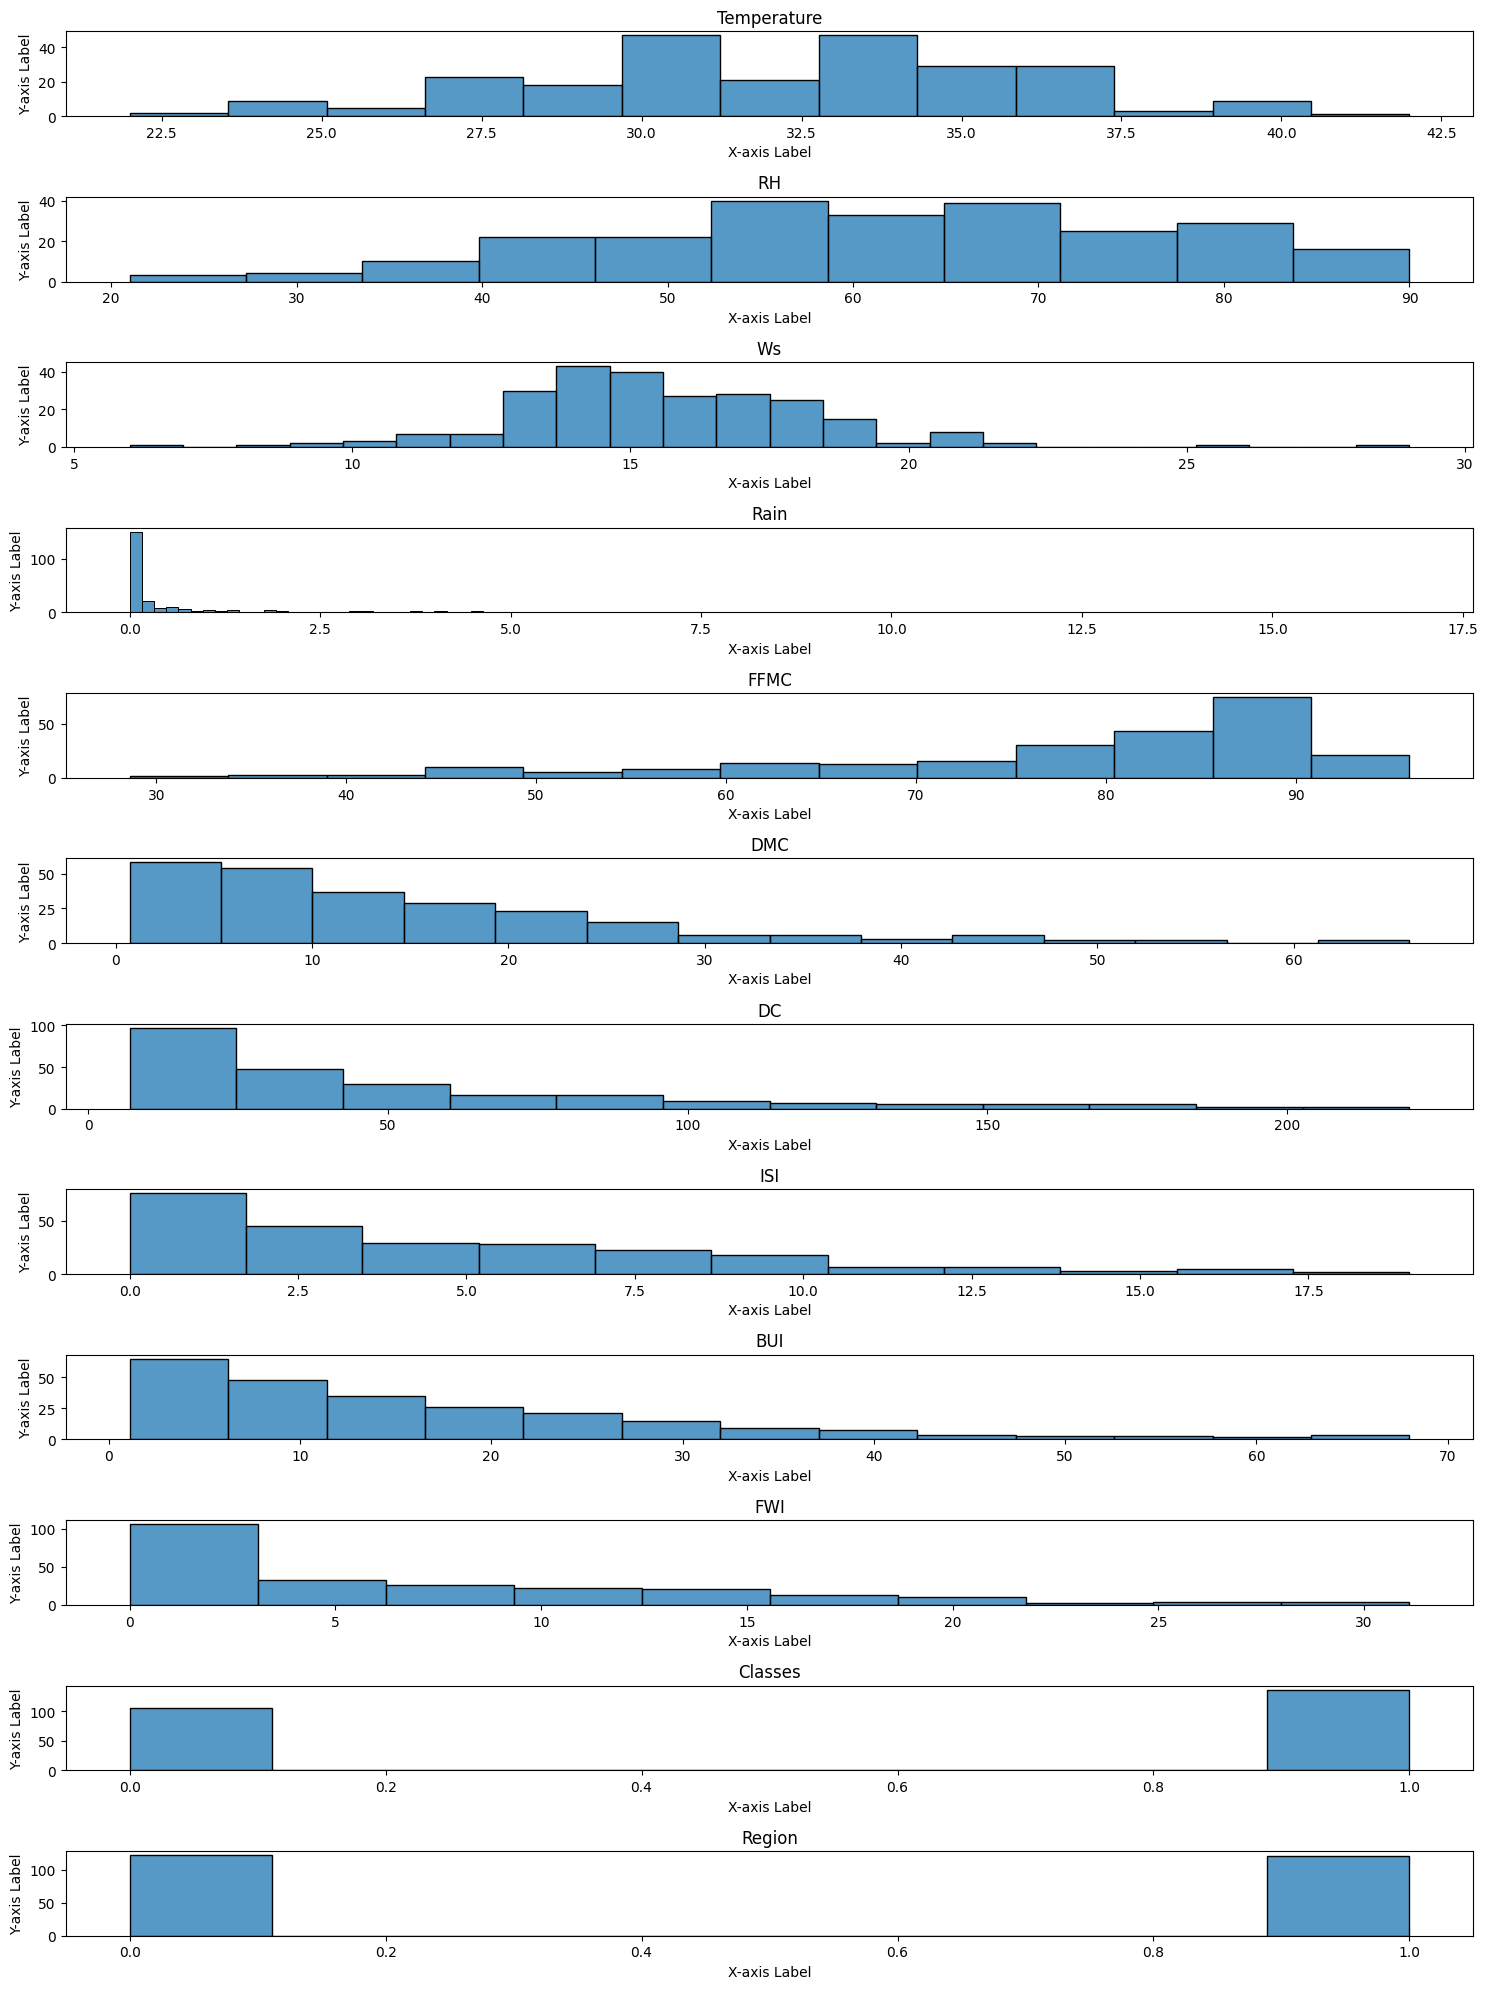

In [41]:
#checking the distribution of the dataset visually
column_names = df.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,20))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

##Method-2 by basic statics method

In [42]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


##Method-3 by plotting the box plot

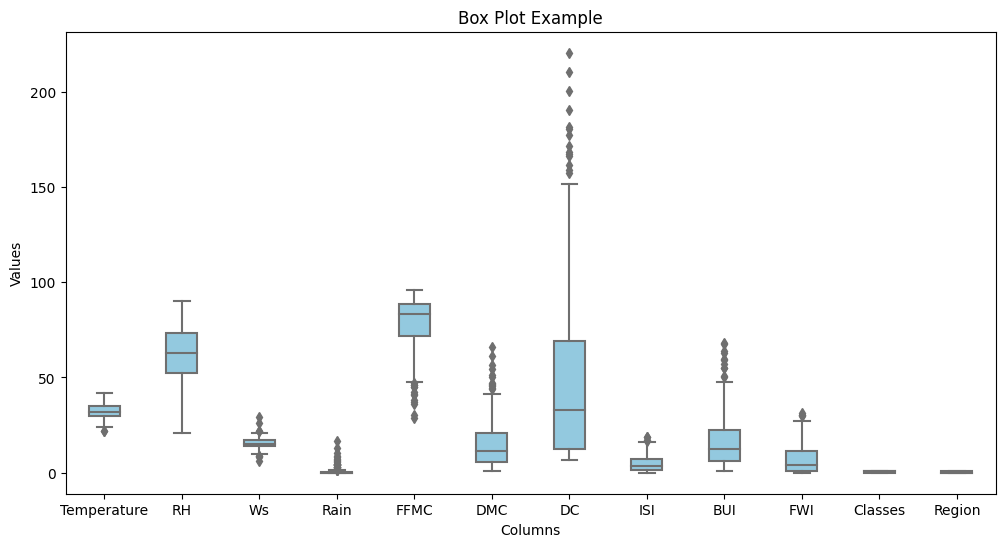

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(df, color='skyblue', width=0.4, orient='v')
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot Example")
plt.show()

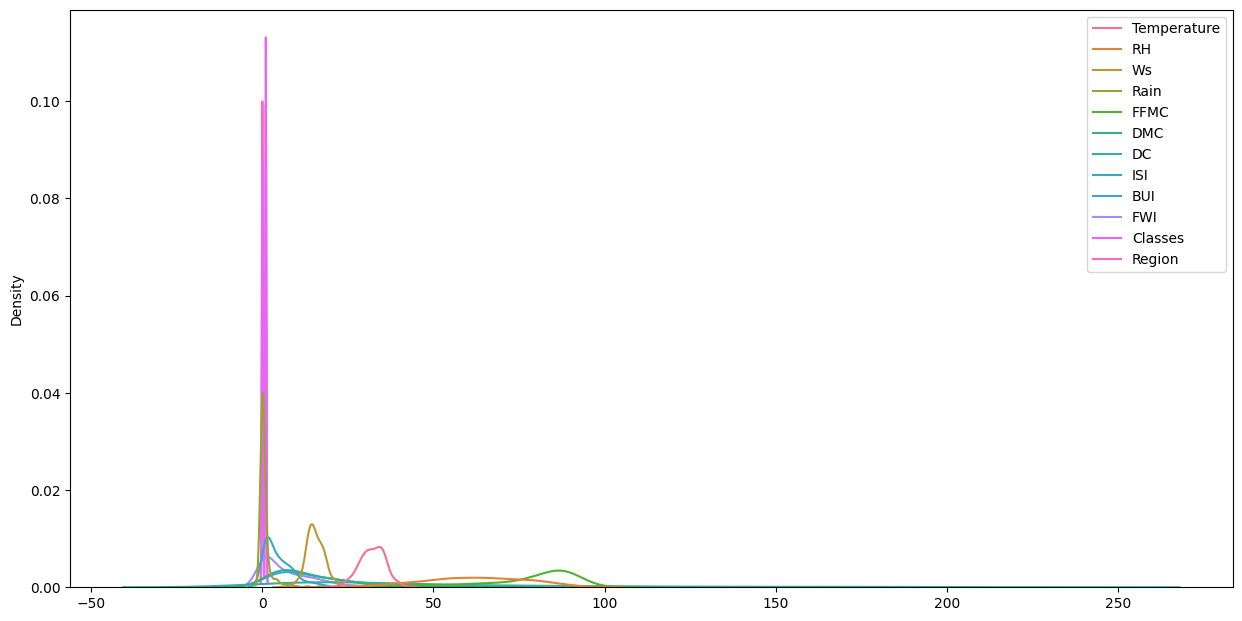

In [ ]:
plt.figure(figsize=(15,7.5))
sns.kdeplot(df)
plt.show()

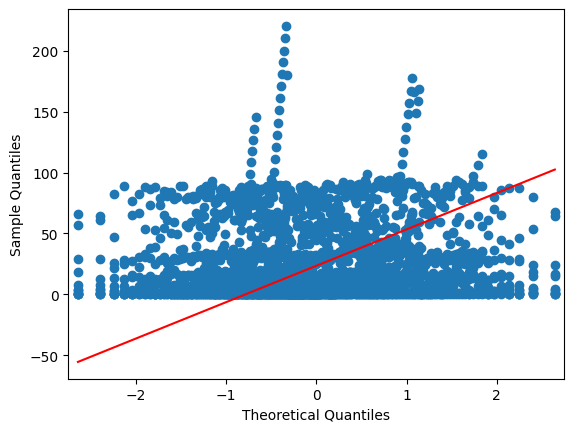

In [ ]:
import statsmodels.api as sm
sm.qqplot(df, line='s')
plt.show()

In [44]:
import scipy
from scipy.stats import stats
z_score_threashold=3
def outliers_extraction_z_score(df):
  num_cols=df.select_dtypes(include=[np.number])#this line of code is to select and store columns with numeric data types
  z_scores=np.abs(scipy.stats.zscore(num_cols))
  return df[(z_scores<=z_score_threashold).all(axis=1)]#this code line is used to filter rows from a DataFrame df based on a condition involving Z-scores

In [45]:
df_clean=outliers_extraction_z_score(df)

In [46]:
df_clean.shape

(225, 12)

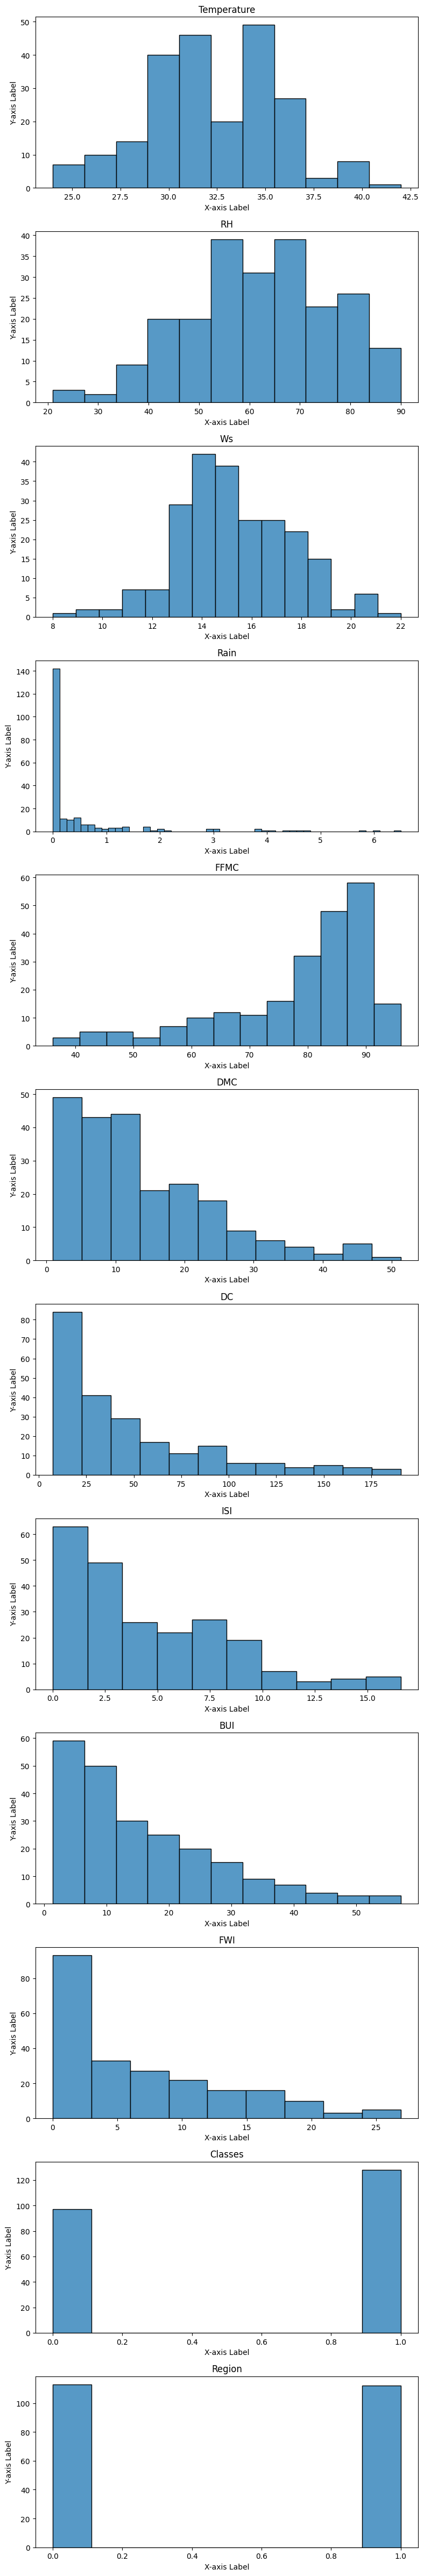

In [47]:
#checking the distribution of the dataset visually
column_names = df_clean.columns

# Set the number of rows and columns for subplots
num_rows = len(column_names)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*4))

# Iterate over each column
for i, column in enumerate(column_names):
    # Select the appropriate subplot
    ax = axs[i] if num_rows > 1 else axs

    # Create a histplot for the column
    sns.histplot(data=df_clean, x=column, ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('X-axis Label')
    ax.set_ylabel('Y-axis Label')
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

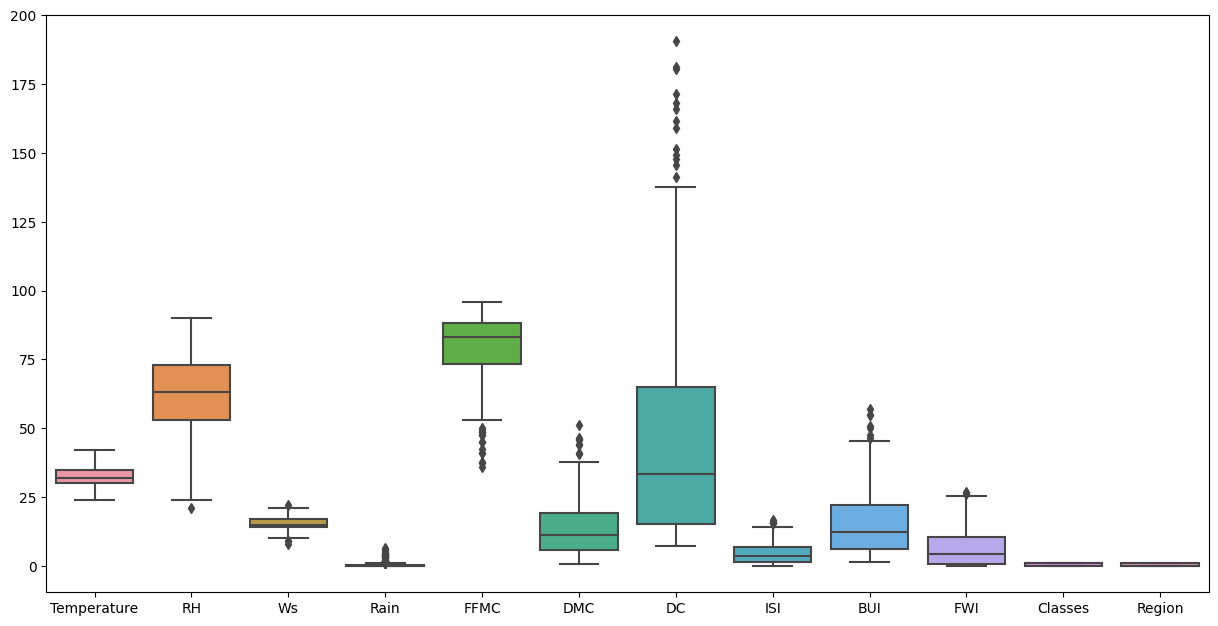

In [48]:
plt.figure(figsize=(15,7.5))
sns.boxplot(df_clean)
plt.show()

In [49]:
df_clean.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,32.288889,62.044444,15.337778,0.516000,78.556889,13.851556,47.222222,4.589778,15.812889,6.644889,0.568889,0.497778
std,3.443564,14.313386,2.460699,1.137554,13.117023,10.512268,42.948546,3.777014,12.227854,6.682285,0.496336,0.501110
min,24.000000,21.000000,8.000000,0.000000,36.100000,0.900000,7.300000,0.000000,1.400000,0.000000,0.000000,0.000000
25%,30.000000,53.000000,14.000000,0.000000,73.200000,6.000000,15.200000,1.500000,6.200000,0.800000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.200000,33.400000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.000000,17.000000,0.400000,88.100000,19.400000,65.100000,7.000000,22.300000,10.700000,1.000000,1.000000
max,42.000000,90.000000,22.000000,6.500000,96.000000,51.300000,190.600000,16.600000,57.100000,26.900000,1.000000,1.000000


In [50]:
df_clean.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.641432,-0.294485,-0.200852,0.616826,0.496385,0.359179,0.591524,0.461497,0.565451,0.478049,0.244853
RH,-0.641432,1.000000,0.230766,0.143956,-0.623859,-0.388454,-0.196933,-0.658827,-0.330638,-0.557325,-0.403235,-0.372810
Ws,-0.294485,0.230766,1.000000,0.075252,-0.139947,-0.027116,0.083074,-0.003325,0.015686,0.016477,-0.070311,-0.180410
Rain,-0.200852,0.143956,0.075252,1.000000,-0.538388,-0.334842,-0.345521,-0.398287,-0.350550,-0.382235,-0.418653,0.105788
FFMC,0.616826,-0.623859,-0.139947,-0.538388,1.000000,0.625013,0.498437,0.761745,0.607390,0.712352,0.768969,0.192430
DMC,0.496385,-0.388454,-0.027116,-0.334842,0.625013,1.000000,0.851966,0.683494,0.977823,0.859217,0.595425,0.194770
DC,0.359179,-0.196933,0.083074,-0.345521,0.498437,0.851966,1.000000,0.498240,0.930754,0.708891,0.494086,-0.098382
ISI,0.591524,-0.658827,-0.003325,-0.398287,0.761745,0.683494,0.498240,1.000000,0.647477,0.943579,0.745867,0.231965
BUI,0.461497,-0.330638,0.015686,-0.350550,0.607390,0.977823,0.930754,0.647477,1.000000,0.842382,0.592394,0.081349
FWI,0.565451,-0.557325,0.016477,-0.382235,0.712352,0.859217,0.708891,0.943579,0.842382,1.000000,0.732173,0.179011


In [51]:
df_clean.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0


##Use Min-Max Scaling when you want to scale features to a specific range (typically 0 to 1) and your data doesn't have significant outliers.

##Use Robust Scaling when your data contains outliers, and you want to scale features in a way that is less sensitive to those outliers.

In [52]:
scaler=StandardScaler()
df_clean_scale=scaler.fit_transform(df_clean)

In [53]:
df_clean_scale=pd.DataFrame(df_clean_scale)

In [54]:
df_clean_scale.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,2.250000e+02,225.000000,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-7.263326e-16,0.000000,2.052679e-16,-7.894919e-18,-2.526374e-16,-7.894919e-17,0.000000,-3.000069e-16,-7.894919e-18,1.578984e-17,6.315935e-17,-1.894781e-16
std,1.002230e+00,1.002230,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.412434e+00,-2.873950,-2.988638e+00,-4.546163e-01,-3.243995e+00,-1.234789e+00,-0.931609,-1.217896e+00,-1.181321e+00,-9.966209e-01,-1.148733e+00,-9.955654e-01
25%,-6.661680e-01,-0.633296,-5.448698e-01,-4.546163e-01,-4.093027e-01,-7.485599e-01,-0.747257,-8.198718e-01,-7.878997e-01,-8.766344e-01,-1.148733e+00,-9.955654e-01
50%,-8.407946e-02,0.066908,-1.375751e-01,-4.546163e-01,3.624059e-01,-2.527968e-01,-0.322550,-2.891723e-01,-2.797301e-01,-3.666920e-01,8.705243e-01,-9.955654e-01
75%,7.890534e-01,0.767113,6.770143e-01,-1.022006e-01,7.291585e-01,5.289834e-01,0.417188,6.395519e-01,5.317021e-01,6.081980e-01,8.705243e-01,1.004454e+00
max,2.826363e+00,1.957460,2.713488e+00,5.272140e+00,1.332772e+00,3.570299e+00,3.345805,3.186910e+00,3.384009e+00,3.037924e+00,8.705243e-01,1.004454e+00


In [55]:
df_clean_scale.columns=[	'Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Classes','Region']

In [56]:
df_clean_scale.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,2.250000e+02,225.000000,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-7.263326e-16,0.000000,2.052679e-16,-7.894919e-18,-2.526374e-16,-7.894919e-17,0.000000,-3.000069e-16,-7.894919e-18,1.578984e-17,6.315935e-17,-1.894781e-16
std,1.002230e+00,1.002230,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.412434e+00,-2.873950,-2.988638e+00,-4.546163e-01,-3.243995e+00,-1.234789e+00,-0.931609,-1.217896e+00,-1.181321e+00,-9.966209e-01,-1.148733e+00,-9.955654e-01
25%,-6.661680e-01,-0.633296,-5.448698e-01,-4.546163e-01,-4.093027e-01,-7.485599e-01,-0.747257,-8.198718e-01,-7.878997e-01,-8.766344e-01,-1.148733e+00,-9.955654e-01
50%,-8.407946e-02,0.066908,-1.375751e-01,-4.546163e-01,3.624059e-01,-2.527968e-01,-0.322550,-2.891723e-01,-2.797301e-01,-3.666920e-01,8.705243e-01,-9.955654e-01
75%,7.890534e-01,0.767113,6.770143e-01,-1.022006e-01,7.291585e-01,5.289834e-01,0.417188,6.395519e-01,5.317021e-01,6.081980e-01,8.705243e-01,1.004454e+00
max,2.826363e+00,1.957460,2.713488e+00,5.272140e+00,1.332772e+00,3.570299e+00,3.345805,3.186910e+00,3.384009e+00,3.037924e+00,8.705243e-01,1.004454e+00


In [57]:
df_clean_scale.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.641432,-0.294485,-0.200852,0.616826,0.496385,0.359179,0.591524,0.461497,0.565451,0.478049,0.244853
RH,-0.641432,1.000000,0.230766,0.143956,-0.623859,-0.388454,-0.196933,-0.658827,-0.330638,-0.557325,-0.403235,-0.372810
Ws,-0.294485,0.230766,1.000000,0.075252,-0.139947,-0.027116,0.083074,-0.003325,0.015686,0.016477,-0.070311,-0.180410
Rain,-0.200852,0.143956,0.075252,1.000000,-0.538388,-0.334842,-0.345521,-0.398287,-0.350550,-0.382235,-0.418653,0.105788
FFMC,0.616826,-0.623859,-0.139947,-0.538388,1.000000,0.625013,0.498437,0.761745,0.607390,0.712352,0.768969,0.192430
DMC,0.496385,-0.388454,-0.027116,-0.334842,0.625013,1.000000,0.851966,0.683494,0.977823,0.859217,0.595425,0.194770
DC,0.359179,-0.196933,0.083074,-0.345521,0.498437,0.851966,1.000000,0.498240,0.930754,0.708891,0.494086,-0.098382
ISI,0.591524,-0.658827,-0.003325,-0.398287,0.761745,0.683494,0.498240,1.000000,0.647477,0.943579,0.745867,0.231965
BUI,0.461497,-0.330638,0.015686,-0.350550,0.607390,0.977823,0.930754,0.647477,1.000000,0.842382,0.592394,0.081349
FWI,0.565451,-0.557325,0.016477,-0.382235,0.712352,0.859217,0.708891,0.943579,0.842382,1.000000,0.732173,0.179011


In [58]:
def correlation(dataset, threshold):
    col_corr = set()#This initializes an empty set col_corr to store the names
                    #of columns that are found to be correlated based on the threshold.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [59]:
correlation(df_clean_scale,0.85)

{'BUI', 'DC', 'FWI'}

In [60]:
df_clean_scale=df_clean_scale.drop(['BUI'],axis=1)

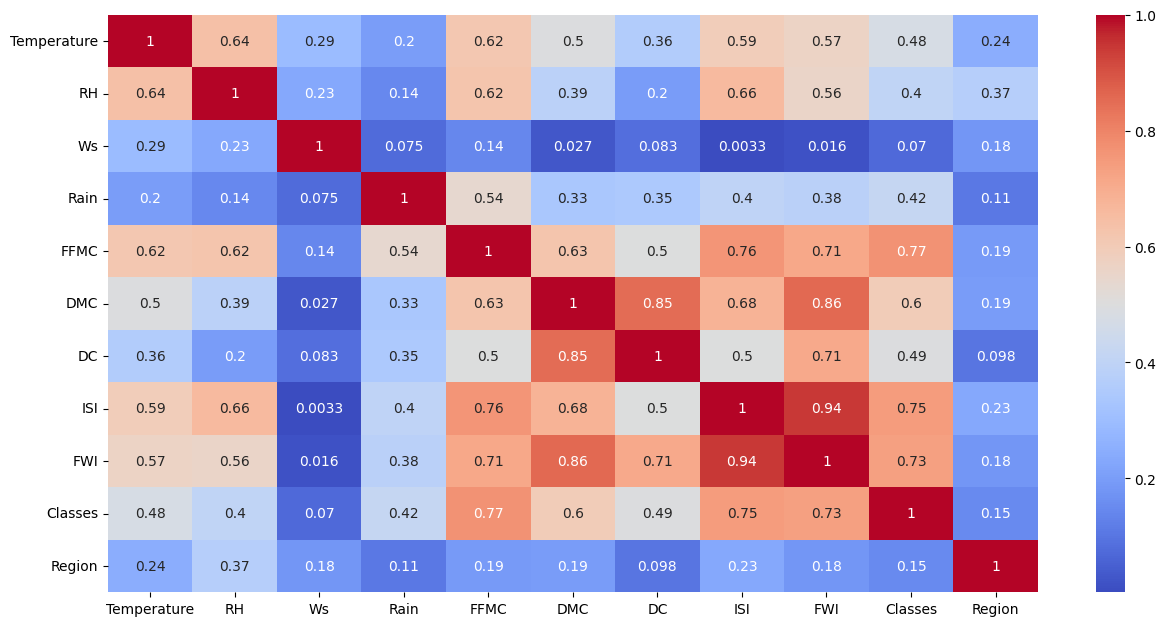

In [61]:
plt.figure(figsize=(15,7.5))
sns.heatmap(df_clean_scale.corr().abs(),annot=True,cmap='coolwarm')
plt.show()

In [62]:
feature_var=df_clean_scale.var()
feature_var

Temperature    1.004464
RH             1.004464
Ws             1.004464
Rain           1.004464
FFMC           1.004464
DMC            1.004464
DC             1.004464
ISI            1.004464
FWI            1.004464
Classes        1.004464
Region         1.004464
dtype: float64

In [63]:
#Defining the x and y variable
x=df_clean_scale.drop('FWI',axis=1)
y=df_clean_scale['FWI']

In [64]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,-0.957212,-0.353214,1.084309,-0.454616,-0.982354,-0.996441,-0.924608,-0.872942,-1.148733,-0.995565
1,-0.957212,-0.073132,-0.952164,0.690735,-1.081682,-0.929704,-0.924608,-0.952547,-1.148733,-0.995565
2,-1.539301,1.047195,0.269720,-0.454616,-1.051120,-1.034577,-0.770593,-0.899477,-1.148733,-0.995565
3,-0.375124,0.346990,-0.544870,-0.454616,0.308921,-0.767628,-0.583908,-0.395312,0.870524,-0.995565
4,0.206965,-0.563276,-0.952164,-0.454616,0.736799,-0.376738,-0.390223,0.480342,0.870524,-0.995565


In [ ]:
y.head()

0   -0.921629
1   -0.936628
2   -0.921629
3   -0.621663
4    0.083257
Name: FWI, dtype: float64

In [66]:
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression

In [73]:
threashold=0.1
selector=VarianceThreshold(0.1)
selector_data=selector.fit_transform(x)
selected_columns=selector.get_feature_names_out()
selected_indices=selector.get_support()
print(selected_columns)
print(selected_indices)

['Temperature' 'RH' 'Ws' 'Rain' 'FFMC' 'DMC' 'DC' 'ISI' 'Classes' 'Region']
[ True  True  True  True  True  True  True  True  True  True]


##Question 1: What is the variance threshold in feature selection, and why is it important in machine learning?

Answer: Variance threshold is a technique used in feature selection to remove features (columns) from a dataset that have very low variance, meaning they don't vary much across the dataset. In machine learning, features with low variance may not provide valuable information for modeling, and keeping them can lead to overfitting or increased computational overhead. Removing low-variance features helps improve the efficiency and effectiveness of machine learning models.

##Question 2: How is variance calculated for a feature in a dataset?

Answer: Variance for a feature in a dataset is calculated using the following formula:

Variance=summition(original datapoint-mean of the series of the datapoint)/no of datapoints.

##Question 3: What is the purpose of applying a variance threshold in feature selection?

Answer: The main purpose of applying a variance threshold in feature selection is to reduce the dimensionality of the dataset and eliminate features that do not contribute significantly to the prediction or classification task. It helps in improving model performance by focusing on relevant features and reducing the risk of overfitting. Additionally, it can lead to faster model training and reduced computational resources.

##Question 4: How do you decide on an appropriate threshold for variance?

Answer: The choice of an appropriate threshold for variance depends on the specific dataset and the problem at hand. It typically involves a trade-off between removing noise and retaining potentially useful information. Commonly, a threshold is chosen based on domain knowledge, experimentation, or by analyzing the distribution of variances across features. Alternatively, you can perform feature selection with different thresholds and use cross-validation to determine the threshold that leads to the best model performance.

##Question 5: Can setting a variance threshold too high or too low have negative consequences?

Answer: Yes, setting a variance threshold too high may lead to the removal of features that contain valuable information, potentially resulting in underfitting or loss of important patterns in the data. On the other hand, setting the threshold too low may retain noisy features, increasing the risk of overfitting and requiring more computational resources. Therefore, choosing an appropriate threshold is crucial to achieving a balance between feature reduction and model performance.

##Q: What challenges might you encounter when using a variance threshold for feature selection?

A:
One challenge is determining the appropriate threshold. Setting it too high might remove features that could be valuable, while setting it too low might retain features with insignificant variance. Another challenge is understanding the context of the problem - some features might have low variance naturally and yet be crucial for the model. Careful analysis and domain knowledge are essential to overcome these challenges.

##Q: Can you explain a scenario where using a variance threshold significantly improved the model's performance?

A:
In a scenario involving a dataset with multiple features describing customer behavior, the dataset contained a few features (e.g., customer ID, constant values) with negligible variance. By applying a variance threshold, these uninformative features were removed, leading to a streamlined dataset. Consequently, the machine learning model's training time reduced, and its performance improved because it focused on relevant features, avoiding noise from the low-variance ones.

##Q: Are there situations where applying a variance threshold might not be suitable?

A:
Yes, in situations where the low-variance features are domain-specific and known to be important, blindly applying a variance threshold might lead to the loss of crucial information. Additionally, in some cases where the dataset is already small, removing features without a thorough understanding of their significance could result in a lack of information, hindering the model's ability to learn effectively.

In [67]:
information_gains=mutual_info_regression(x,y)

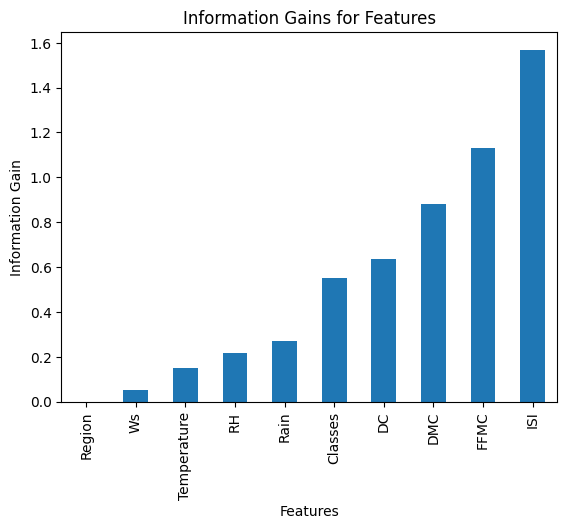

In [68]:
# Convert the NumPy array to a Pandas Series
information_gains_series = pd.Series(information_gains, index=x.columns).sort_values()

# Plot the Information Gains as a bar chart
information_gains_series.plot(kind='bar')
plt.title("Information Gains for Features")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.show()

In [72]:
# Print the Information Gains for each feature
for feature_name, info_gain in zip(x.columns, information_gains):
    print(f"Feature: {feature_name}, Information Gain: {info_gain:.4f}")

Feature: Temperature, Information Gain: 0.1497
Feature: RH, Information Gain: 0.2172
Feature: Ws, Information Gain: 0.0498
Feature: Rain, Information Gain: 0.2703
Feature: FFMC, Information Gain: 1.1324
Feature: DMC, Information Gain: 0.8792
Feature: DC, Information Gain: 0.6349
Feature: ISI, Information Gain: 1.5696
Feature: Classes, Information Gain: 0.5496
Feature: Region, Information Gain: 0.0000


##Question 1:
Q: What is Information Gain in the context of feature selection?

A:
Information Gain is a metric used in feature selection to measure the reduction in entropy or uncertainty in a dataset when a particular feature is included. It quantifies how much a feature contributes to making predictions or classifying data points correctly.

##Q: How is Information Gain calculated, and what does a high Information Gain value indicate?

A:
Information Gain is calculated using entropy. The formula is as follows:
Information Gain
=
Entropy(parent)
−
∑Entropy(child Information Gain=Entropy(parent)−∑(
NN i⋅Entropy(child i​))
A high Information Gain value indicates that adding the feature to the model results in a significant reduction in uncertainty or entropy, making it a valuable predictor.

##Question 3:
Q: Can Information Gain be used with any type of data, or are there specific data types for which it is more suitable?

A:
Information Gain is commonly used with categorical data, particularly in decision tree-based algorithms. It can also be adapted for numerical data by discretizing it into bins. However, for continuous data, other metrics like Gini Impurity or Mean Squared Error reduction may be more appropriate.

##Question 4:
Q: How is Information Gain used in decision tree algorithms for feature selection?

A:
In decision trees, Information Gain is used to determine the order in which features are split. The feature with the highest Information Gain is chosen as the root node of the tree. Then, the process is repeated recursively for the child nodes, selecting the feature with the highest Information Gain at each step to create a tree that best separates the data.

##Question 5:
Q: What are the limitations or potential drawbacks of using Information Gain for feature selection?

A:
Information Gain tends to favor features with many distinct values (high cardinality) as they can potentially lead to a greater reduction in entropy. This can result in overlooking features with lower cardinality that may still be informative. Additionally, Information Gain doesn't handle continuous numerical features well without discretization.

##Q: Can you explain a scenario where Information Gain played a crucial role in improving a machine learning model's performance?

A:
In a spam email classification problem, Information Gain was used to select features (words or phrases) that provided the most significant reduction in uncertainty when distinguishing between spam and non-spam emails. By focusing on these informative features, the model achieved better accuracy in identifying spam emails, leading to improved performance.

##Question 7:
Q: How do you handle missing data when calculating Information Gain for feature selection?

A:
Handling missing data is essential. Typically, you can impute missing values with a placeholder value or use techniques like mean imputation or more advanced imputation methods. The choice of imputation method can affect Information Gain calculations and, subsequently, feature selection.



```
# This is formatted as code
```

##Splitting the data

##Question 1:
Q: What is the purpose of the train-test split in machine learning?

A:
The train-test split is used to divide a dataset into two parts: one for training a machine learning model (the training set) and another for evaluating its performance (the test set). It helps in assessing how well the model generalizes to unseen data and avoids overfitting.

##Question 2:
Q: What is the typical ratio for splitting a dataset into a training set and a test set?

A:
A common ratio is 70-80% of the data for training and the remaining 20-30% for testing. However, the exact split ratio can vary depending on the size and nature of the dataset, the problem at hand, and the available data.

##Question 3:
Q: What are some potential issues with using a very small test set during the train-test split?

A:
Using a very small test set can result in high variability in performance metrics, making it difficult to assess a model's true generalization performance. It may also lead to unreliable conclusions about model performance and may not detect overfitting effectively.

##Question 4:
Q: What precautions should you take to ensure a fair train-test split?

A:
To ensure a fair train-test split:

Shuffle the dataset before splitting to remove any order-related biases.
Ensure that both the training and test sets are representative of the overall dataset.
Maintain the class distribution (for classification problems) in both sets, especially in imbalanced datasets.
Use stratified sampling when necessary, ensuring that each class is proportionally represented.
##Question 5:
Q: What is the danger of data leakage in the train-test split, and how can you prevent it?

A:
Data leakage occurs when information from the test set unintentionally influences the training process. To prevent data leakage, ensure that all data preprocessing steps (e.g., scaling, feature engineering) are applied separately to the training and test sets. Additionally, avoid using any test set information during model training, such as using test set statistics or target values.

##Question 6:
Q: When might you consider using a validation set in addition to a train-test split?

A:
A validation set is useful when you need to perform hyperparameter tuning or model selection. It allows you to evaluate different model configurations on a separate dataset before finalizing the model with the test set. This helps prevent overfitting hyperparameters to the test set.

##Question 7:
Q: How can you evaluate a model's performance using the test set after the train-test split?

A:
You can evaluate a model's performance using various metrics, depending on the type of problem. Common evaluation metrics include accuracy, precision, recall, F1-score, ROC AUC, mean squared error (MSE), and others. The choice of metric depends on whether the problem is classification, regression, or another type.

##Question 8:
Q: What is the purpose of setting a random seed when performing a train-test split?

A:
Setting a random seed ensures reproducibility. It makes the train-test split deterministic, so every time you split the data, you get the same result. This is important when you want to compare or share results with others or when you need to reproduce your experiments.

##Question 9:
Q: Can you explain the concept of cross-validation and how it relates to the train-test split?

A:
Cross-validation is a technique used to repeatedly split the data into training and test sets to assess a model's performance. It helps in obtaining a more robust estimate of a model's performance by averaging over multiple splits. The train-test split is a basic form of cross-validation, specifically the "holdout" method, where you split the data into two sets once. Other cross-validation methods, like k-fold cross-validation, involve multiple train-test splits.

##Question 10:
Q: What are some best practices for choosing a random seed for the train-test split?

A:

Use a fixed random seed for reproducibility in your experiments.
Choose a random seed that is unlikely to conflict with other random processes in your code.
Document the chosen random seed to ensure consistency in future runs and when sharing code with others.

In [74]:
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

In [75]:
x_train.shape

(180, 10)

In [ ]:
y_train.shape

(180,)

In [ ]:
x_test.shape

(45, 10)

In [ ]:
y_test.shape

(45,)

##1. What is Linear Regression?
Answer: Linear Regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more predictor variables by finding the linear relationship between them.

##2. What are the two types of Linear Regression?
Answer: Simple Linear Regression (SLR) and Multiple Linear Regression (MLR).

##3. Explain Simple Linear Regression (SLR).
Answer: SLR involves predicting a target variable using a single predictor variable. The relationship between the two variables is modeled as a straight line (linear).

##4. What is the formula for the equation of a straight line in SLR?
Answer: The formula is: y = b0 + b1 * x, where y is the target variable, x is the predictor variable, b0 is the intercept, and b1 is the slope.

##5. How are the coefficients (b0 and b1) in SLR calculated?
Answer: The coefficients are calculated using the method of least squares, which minimizes the sum of the squared differences between actual and predicted values.

##6. What is the purpose of the intercept (b0) in SLR?
Answer: The intercept (b0) represents the value of the target variable when the predictor variable is zero.

##7. Explain Multiple Linear Regression (MLR).
Answer: MLR extends SLR by allowing multiple predictor variables to be used in the regression model. It models the relationship between the target variable and multiple predictors linearly.

##8. What is the formula for the equation of a hyperplane in MLR?
Answer: The formula is: y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn, where y is the target variable, xi are the predictor variables, and bi are the coefficients.

##9. What is the purpose of the coefficients (bi) in MLR?
Answer: The coefficients represent the change in the target variable for a one-unit change in the corresponding predictor variable while keeping other variables constant.

##10. What is the difference between correlation and regression?
Answer: Correlation measures the strength and direction of a linear relationship between two variables without implying causation. Regression, on the other hand, models the relationship between variables and can be used for prediction and inference.

##11. What are the assumptions of Linear Regression?
Answer: The common assumptions include linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of errors.

##12. How can you check for multicollinearity in MLR?
Answer: Multicollinearity occurs when predictor variables are highly correlated. It can be checked using correlation matrices or variance inflation factors (VIFs).

##13. What is the residual in Linear Regression?
Answer: A residual is the difference between the actual value of the target variable and the predicted value by the regression model. It represents the error in prediction.

##14. How do you assess the goodness of fit in Linear Regression?
Answer: You can assess the goodness of fit by examining metrics such as R-squared (R2), Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

##15. What does an R-squared (R2) value of 0.8 indicate?
Answer: An R2 value of 0.8 means that 80% of the variance in the target variable is explained by the regression model, indicating a good fit.

##16. What is the purpose of regularization techniques in Linear Regression?
Answer: Regularization techniques (e.g., Lasso and Ridge regression) are used to prevent overfitting by adding penalty terms to the regression equation.

##17. Explain the difference between L1 and L2 regularization.
Answer: L1 regularization (Lasso) adds an absolute value of the coefficients as a penalty, leading to feature selection. L2 regularization (Ridge) adds the squared value of the coefficients as a penalty, which shrinks but does not eliminate them.

##18. How do you handle categorical variables in Linear Regression?
Answer: Categorical variables are converted into dummy variables (one-hot encoding) to include them in the regression model.

##19. What are the potential issues with outliers in Linear Regression?
Answer: Outliers can affect the model's coefficients and distort predictions. Robust regression techniques can be used to mitigate the impact of outliers.

##20. When should you use Linear Regression as opposed to other regression techniques?
Answer: Linear Regression is suitable when there is a linear relationship between the target and predictor variables. If the relationship is non-linear, other regression techniques (e.g., Polynomial Regression, Decision Trees) may be more appropriate.

In [76]:
model1=LinearRegression()

In [77]:
model1.fit(x_train,y_train)

LinearRegression()

In [78]:
model1.coef_

array([-0.00320461,  0.01755585, -0.00999716,  0.01192403, -0.13093267,
        0.32180316,  0.10682266,  0.77905982,  0.0249436 , -0.02508887])

In [79]:
model1.intercept_

-0.0019627958295752417

In [80]:
y_pred_train=model1.predict(x_train)

In [81]:
y_pred_test=model1.predict(x_test)

In [82]:
from sklearn.metrics import r2_score

In [83]:
test_accu_r2=r2_score(y_test,y_pred_test)
test_accu_r2

0.9805564155297511

In [84]:
train_accu_r2=r2_score(y_train,y_pred_train)
train_accu_r2

0.9899026163225216

##Checking with other Model selection techniques-Cross Validation

In [88]:
split=10
cv_train=cross_val_score(model1,x_train,y_train,scoring='r2').mean()
print("Train accuracy by cross validation-",cv_train)
cv_test=cross_val_score(model1,x_test,y_test,scoring='r2').mean()
print("Test accuracy by cross validation-",cv_test)


Train accuracy by cross validation- 0.9852284621536869
Test accuracy by cross validation- 0.9354892209098999


In [91]:
kfold=KFold(n_splits=split,random_state=42,shuffle=True)
cv_train=cross_val_score(model1,x_train,y_train,cv=kfold,scoring='r2').mean()
print("Train accuracy by cross validation k fold-",cv_train)
cv_test=cross_val_score(model1,x_test,y_test,cv=kfold,scoring='r2').mean()
print("Test accuracy by cross validation kfold-",cv_test)



Train accuracy by cross validation k fold- 0.9866447304187236
Test accuracy by cross validation kfold- 0.936283881993905


###Grid search cv

In [97]:
grid_param={'fit_intercept':[True,False]}
grid_search=GridSearchCV(estimator=model1,param_grid=grid_param,scoring='r2',cv=kfold)
grid_search=grid_search.fit(x,y)
grid_search


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [99]:
best_model = grid_search.best_estimator_
best_model

LinearRegression(fit_intercept=False)

##LETS FIND THE RESIDUAL ERRORS
into the regression problem our aim is to find the best fit line into our model which is very close to orr actual points.

##Q: What is the main goal of regression metrics in machine learning?

A:
The main goal of regression metrics is to quantitatively measure the quality of predictions made by regression models. These metrics help us assess how well a model's predictions align with the true values of the target variable.
##Q: What is Mean Absolute Error (MAE), and how is it calculated?

A:
Mean Absolute Error (MAE) is a regression metric that calculates the average absolute differences between predicted and actual values. It is computed as the sum of absolute differences divided by the number of data points.

Formula: MAE = (1/n) * Σ|actual - predicted|
##Q: Describe the concept of Mean Squared Error (MSE) and its advantages and disadvantages.

A:
Mean Squared Error (MSE) is a regression metric that calculates the average of squared differences between predicted and actual values. Advantages include penalizing larger errors more heavily, while disadvantages include being sensitive to outliers due to squaring.

Formula: MSE = (1/n) * Σ(actual - predicted)^2
##Q: What is Root Mean Squared Error (RMSE), and how is it related to MSE?

A:
Root Mean Squared Error (RMSE) is the square root of the MSE. It is used to measure the average magnitude of the errors in the same units as the target variable. RMSE provides more interpretable results compared to MSE.

Formula: RMSE = sqrt(MSE)
##Q: Explain the concept of R-squared (R2) in regression. What does it indicate about a model's performance?

A:
R-squared (R2) is a metric that measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit. An R2 value of 1 means the model perfectly explains the variance, while 0 means the model provides no improvement over a simple mean.

Formula: R2 = 1 - (MSE(model) / MSE(mean))
##Q: What is the difference between MAE, MSE, and RMSE? In what scenarios would you prefer one metric over the others?

A:

MAE measures the average magnitude of errors, making it less sensitive to outliers.
MSE squares errors, penalizing larger errors more heavily.
RMSE is the square root of MSE and provides interpretable results in the same units as the target variable.
MAE is preferred when outliers should not have a strong impact. MSE and RMSE are useful when larger errors should be penalized.
##Q: How would you interpret a negative R-squared (R2) value for a regression model?

A:
A negative R-squared value typically indicates that the model performs worse than a horizontal line (a line that predicts the mean of the target variable). It suggests that the model does not explain any variance and may be a poor fit for the data.
##Q: What is the purpose of the Adjusted R-squared (Adj-R2) metric, and when should you use it instead of R-squared (R2)?

A:
Adjusted R-squared (Adj-R2) adjusts R-squared for the number of predictors in the model. It accounts for model complexity and prevents overfitting. Use Adj-R2 when comparing models with different numbers of features to identify the best trade-off between explanatory power and complexity.

Formula: Adj-R2 = 1 - [(1 - R2) * ((n - 1) / (n - p - 1))]

(n: number of samples, p: number of predictors)
##Q: Can you explain the concept of Mean Absolute Percentage Error (MAPE)? When is it useful?

A:
Mean Absolute Percentage Error (MAPE) measures the average percentage difference between predicted and actual values. It is useful when you want to assess the accuracy of predictions in terms of percentage errors, such as in forecasting problems.

Formula: MAPE = (1/n) * Σ(|(actual - predicted) / actual| * 100)
##Q: Describe some scenarios where you might prefer one regression metric over others based on the characteristics of the problem or the data.

A:

Use MAE when you want a metric that is robust to outliers.
Use MSE or RMSE when you want to penalize larger errors more heavily.
Use R-squared when you want to understand the proportion of variance explained by the model.
Use MAPE when you want to assess percentage errors in forecasting problems.

In [103]:
#RESIDUAL ERROR IS THE SUMMISION OF(DIFFERENCE BETWEEN ACTUAL POINTS AND PREDICTED POINTS)
from sklearn.metrics import mean_squared_error as mse
training_error=mse(y_train,y_pred_train)
print(training_error*100)

1.036874541856677


In [102]:
test_error=mse(y_test,y_pred_test)
print(test_error*100)

1.7090286073233634


In [104]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_train,y_pred_train)

0.15954308991771524

In [105]:
mape(y_test,y_pred_test)

0.28426378432941324

##Fitting some regularization techniques
##Ridge Regression

Ridge Regression:
#Question 1: What is Ridge Regression, and why is it used?

Answer: Ridge Regression is a regularization technique used in linear regression to prevent overfitting by adding an L2 penalty term to the loss function. It helps in reducing the complexity of the model and improving its generalization by shrinking the coefficients.

#Question 2: Explain the key difference between Ridge Regression and standard Linear Regression.

Answer: The main difference is that Ridge Regression adds an L2 regularization term to the linear regression cost function, which penalizes large coefficients, while standard Linear Regression does not include any regularization.

#Question 3: How does Ridge Regression handle multicollinearity in predictor variables?

Answer: Ridge Regression is effective in handling multicollinearity (high correlation between predictors) because it penalizes large coefficients. It tends to distribute the weight of correlated variables more evenly, preventing one variable from dominating the others.

#Question 4: What is the role of the regularization hyperparameter (α) in Ridge Regression?

Answer: The regularization hyperparameter α controls the strength of regularization in Ridge Regression. Larger values of α increase the penalty, resulting in more regularization and smaller coefficients.

Lasso Regression:
#Question 5: What is Lasso Regression, and why is it used?

Answer: Lasso Regression is another regularization technique used in linear regression. It adds an L1 penalty term to the loss function, which not only prevents overfitting but also performs feature selection by setting some coefficients to zero.

#Question 6: Explain the primary difference between Lasso Regression and Ridge Regression.

Answer: The key difference is that Lasso Regression uses an L1 penalty, which has a sparsity-inducing effect, leading to feature selection. In contrast, Ridge Regression uses an L2 penalty, which shrinks coefficients but rarely sets them exactly to zero.

#Question 7: How does Lasso Regression help with feature selection?

Answer: Lasso Regression sets some coefficients to exactly zero, effectively removing those features from the model. This feature selection property makes Lasso valuable in situations where identifying important predictors is crucial.

#Question 8: What is the importance of the regularization hyperparameter (α) in Lasso Regression?

Answer: The α hyperparameter in Lasso Regression controls the strength of regularization. Higher α values increase the penalty, leading to more regularization and potentially more feature selection.

#ElasticNetCV:
Question 9: What is ElasticNetCV, and why is it used?

Answer: ElasticNetCV is a combination of Ridge and Lasso regularization techniques, adding both L1 (Lasso) and L2 (Ridge) penalty terms to the loss function. It is used to achieve a balance between feature selection and coefficient shrinkage.

#Question 10: How does ElasticNetCV allow for a trade-off between L1 and L2 regularization?

Answer: ElasticNetCV introduces an additional hyperparameter, α, which controls the mix of L1 and L2 regularization. A value of 0 corresponds to pure Ridge, 1 corresponds to pure Lasso, and values in between create a blend of the two.

#Question 11: What are the advantages of using ElasticNetCV over Ridge or Lasso alone?

Answer: ElasticNetCV combines the strengths of Ridge and Lasso, making it more versatile. It can handle multicollinearity, perform feature selection, and offer a balance between bias and variance.

#Question 12: How does cross-validation play a role in selecting the optimal hyperparameters in ElasticNetCV?

Answer: Cross-validation is used in ElasticNetCV to evaluate different combinations of hyperparameters, such as the α value and the strength of regularization. The combination that yields the best cross-validated performance is chosen as the optimal model.

#These interview questions and answers should help you demonstrate your understanding of Ridge, Lasso, and ElasticNetCV regularization techniques and their applications in machine learning.

In [106]:
from sklearn.linear_model import Ridge
model2=Ridge(0.1)

In [107]:
model2.fit(x_train,y_train)

Ridge(alpha=0.1)

In [108]:
y_pred_train=model2.predict(x_train)

In [109]:
y_pred_test=model2.predict(x_test)

In [111]:
mape(y_train,y_pred_train)*100

15.890097366901292

In [112]:
r2_score(y_train,y_pred_train)*100

98.9901841572608

In [113]:
mse(y_train,y_pred_train)*100

1.0369540989466484

In [114]:
mse(y_test,y_pred_test)*100

1.7057426551727497

In [116]:
r2_score(y_test,y_pred_test)*100

98.0593799742006

In [117]:
mape(y_test,y_pred_test)*100

28.426691207101605

##Fitting Lasso Regression

In [118]:
from sklearn.linear_model import Lasso
model3=Lasso(0.1)

In [119]:
model3.fit(x_train,y_train)

Lasso(alpha=0.1)

In [120]:
y_pred_train=model3.predict(x_train)

In [121]:
y_pred_test=model3.predict(x_test)

In [122]:
mape(y_train,y_pred_train)

0.32253986345626284

In [123]:
r2_score(y_train,y_pred_train)

0.9698484391183227

In [124]:
mse(y_train,y_pred_train)

0.030961867820457158

In [125]:
mse(y_test,y_pred_test)

0.03803545776744778

In [126]:
r2_score(y_test,y_pred_test)

0.9567271353564871

In [127]:
mape(y_test,y_pred_test)

0.43963224722641814

In [128]:
from sklearn.linear_model import ElasticNet

In [129]:
model4=ElasticNet(0.1)

In [130]:
model4.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [131]:
y_pred_train=model4.predict(x_train)

In [132]:
y_pred_test=model4.predict(x_test)

In [133]:
mape(y_train,y_pred_train)

0.2813277717127037

In [134]:
r2_score(y_train,y_pred_train)

0.976476479518235

In [135]:
mse(y_train,y_pred_train)

0.024155702409118827

In [136]:
mse(y_test,y_pred_test)

0.029893483667542464

In [137]:
r2_score(y_test,y_pred_test)

0.9659902430942813

In [138]:
mape(y_test,y_pred_test)

0.4170917128168182

Loss Function in Regression:
#Question 1: What is the purpose of a loss function in regression algorithms?

Answer: A loss function in regression quantifies the difference between predicted values and actual target values. It is used to measure how well a model's predictions align with the observed data and serves as the basis for model parameter estimation.

#Question 2: What are the characteristics of a good loss function in regression?

Answer: A good loss function should:

Be differentiable (for gradient-based optimization).
Penalize large errors more significantly.
Produce a single scalar value to represent the overall model performance.
Be interpretable and relevant to the problem domain.
#Question 3: Explain the Mean Squared Error (MSE) loss function in regression.

Answer: The Mean Squared Error (MSE) calculates the average of the squared differences between predicted and actual values. It penalizes larger errors more heavily, making it suitable for regression problems where minimizing the variance of errors is important.

#Question 4: What is the difference between Mean Absolute Error (MAE) and Mean Squared Error (MSE) as loss functions?

Answer: MAE measures the average absolute differences between predicted and actual values, while MSE measures the average of squared differences. MSE is more sensitive to outliers due to squaring, whereas MAE treats all errors equally.

Ordinary Least Squares (OLS):
#Question 5: What is Ordinary Least Squares (OLS) in linear regression?

Answer: Ordinary Least Squares is a method used to estimate the coefficients of a linear regression model by minimizing the sum of squared differences between predicted and actual values. It finds the line that best fits the data in terms of minimizing the sum of squared residuals.

#Question 6: How are the coefficients calculated in OLS?

Answer: The coefficients in OLS are calculated by finding the values of the intercept and slope that minimize the sum of squared residuals. This is typically done using mathematical optimization techniques.

#Question 7: What are the assumptions of OLS in linear regression?

Answer: Common assumptions of OLS include:

Linearity: The relationship between predictors and the target variable is linear.
Independence of Errors: Residuals are independent of each other.
Homoscedasticity: The variance of residuals is constant.
Normality of Errors: Residuals follow a normal distribution.
Question 8: What is the significance of the residuals in OLS?

Answer: Residuals in OLS represent the errors or the differences between predicted and actual values. They are important for assessing the goodness of fit of the model and checking whether the assumptions of linear regression hold.

#Question 9: When is OLS appropriate, and what are its advantages and disadvantages?

Answer: OLS is appropriate when the linear relationship between predictors and the target variable is valid. Its advantages include simplicity, interpretability of coefficients, and the ability to provide unbiased estimates. However, it can be sensitive to outliers and multicollinearity.

These questions and answers should help you understand the concepts of loss functions and Ordinary Least Squares in the context of regression algorithms, which can be useful for interviews and discussions related to machine learning and statistics.

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

##Decesion tree regressor

In [140]:
model5=DecisionTreeRegressor(max_depth=100,random_state=42,criterion='squared_error')

In [141]:
model5.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100, random_state=42)

In [142]:
y_pred_train=model5.predict(x_train)

In [143]:
y_pred_test=model5.predict(x_test)

In [144]:
mape(y_train,y_pred_train)

1.5816680264538906e-17

In [145]:
r2_score(y_train,y_pred_train)

1.0

In [146]:
mse(y_train,y_pred_train)

1.6434602192104412e-33

In [147]:
mse(y_test,y_pred_test)

0.029723292575745578

In [148]:
r2_score(y_test,y_pred_test)

0.9661838691608817

In [149]:
mape(y_test,y_pred_test)

0.28050633424076643

###Fitting ensambled techniques

In [150]:
model6=BaggingRegressor(estimator=model5,n_estimators=100,max_features=4)

In [151]:
model6.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=100,
                                                 random_state=42),
                 max_features=4, n_estimators=100)

In [152]:
y_pred_train=model6.predict(x_train)
y_pred_test=model6.predict(x_test)

In [153]:
r2_score(y_train,y_pred_train)

0.9933154642871335

In [154]:
r2_score(y_test,y_pred_test)

0.9766067845760996